# 1. Introduction 

I will be using a Principal Component Analysis (PCA) based approach to analysing the IMDB dataset and then implementing some KMeans clustering to provide visualisations of any related clusters I find in the dataset. 
The notebook  is organised as folows :

  1.Filtering Dataset to revome null values
  
  2.Using the measure of Explained Variance to motivate and inform our search on getting the right number of PCA projections.
  
  3.Implement PCA
  
  4.Using KMeans clustering to investigate relationships in the PCA projections (if there are any at all) and creating visualisations using the said clusters.

In [2]:
import numpy as np #linear algebra
import pandas as pd  #data processing csv file
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline

Import the move dataset. Inspect the firt 5 rows of the dataframe



In [3]:
df=pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#  Data filtering and cleansing

In the dataframe, some columns contain number while, other worlds. As we need numerical values for Acp, let's do filtering to extract only the numerics columns.


In [4]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)

We can create a new dataframe containnig just the numerics values


In [5]:
df_new=df[num_list]
df_new.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,7.1,0,NaN,NaN,8,NaN


###  Removal of Null Values

Now since there still exists 'NaN' values in our dataframe, and these are Null values, we have to do something about them. In here, I will just do the naive thing of replacing these NaNs with zeros as such:

In [6]:
df = df_new.fillna(value=0, axis=1)
df.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,0.0,0.00,0.0,143,131.0,0.0,0.0,0.0,7.1,0,0.0,0.0,8,0.0


### Standardisation

Finally we mentioned that we have to find some sort of way to standardise the data and for this, we use sklearn's StandardScaler.

In [7]:
X = df.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Let's look the correlation betwen the variables, by plotting the the correlation matrix with seaborn 

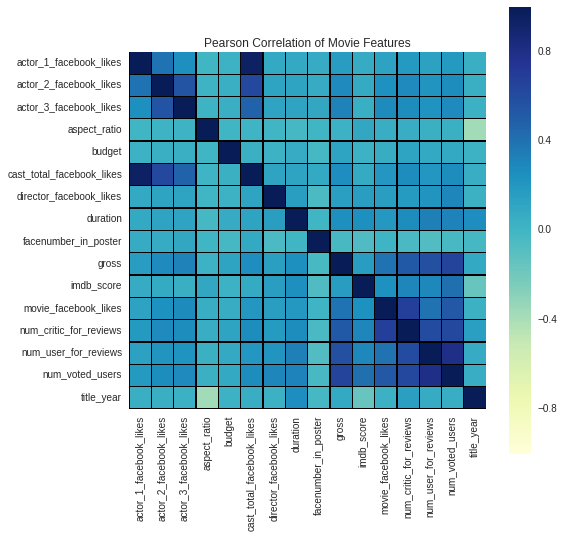

In [8]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

As we can see from the heatmap, there are regions (features) where we can see quite positive linear correlations amongst each other, given the darker shade of the colours - top left-hand corner and bottom right quarter. This is a good sign as it means we may be able to find linearly correlated features for which we can perform PCA projections on.

# 2. EXPLAINED VARIANCE MEASURE


As alluded to in the Introduction, I will be using a particular measure called Explained Variance which will be useful in this context to help us determine the number of PCA projection components we should be looking at. I will use The PCA fonction in Sklearn.


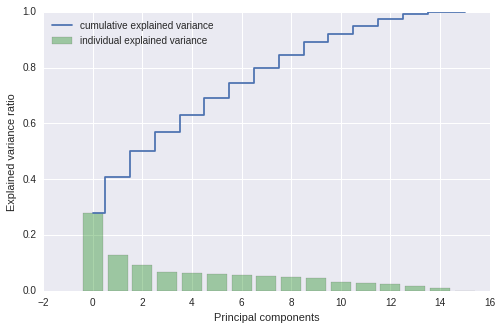

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std) 
var_exp=(pca.explained_variance_ratio_) 
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(8, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

From the plot above, it can be seen that approximately 90% of the variance can be explained with the 9 principal components. Therefore for the purposes of this notebook, let's implement PCA with 9 components ( although to ensure that we are not excluding useful information, one should really go for 95% or greater variance level which corresponds to about 12 components).


# 3. PRINCIPAL COMPONENT ANALYSIS

Having roughly identified how many components/dimensions we would like to project on, let's now implement sklearn's PCA module.
The first line of the code contains the parameters "n_components" which states how many PCA components we want to project the dataset onto. Since we are going implement PCA with 9 components, therefore we set n_components = 9.
The second line of the code calls the "fit_transform" method, which fits the PCA model with the standardised movie data X_std and applies the dimensionality reduction on this dataset.

In [10]:
pca = PCA(n_components=9)
x_9d = pca.fit_transform(X_std)

Let's visualise the first 2 projection components as a 2D scatter plot to see if we can get a quick feel for the underlying data.

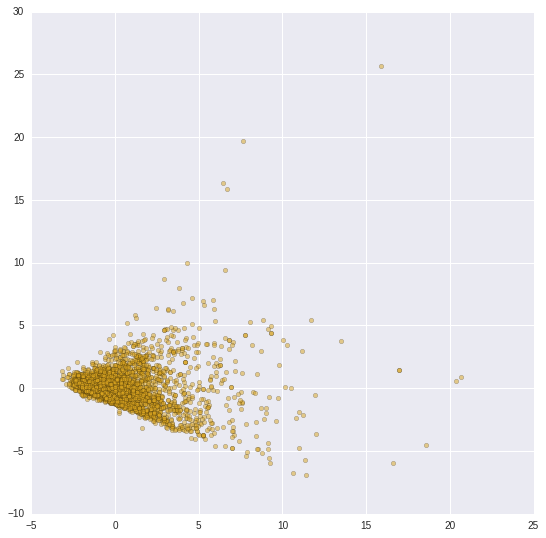

In [11]:
plt.figure(figsize = (9,9))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

My aim is to see if we can observe distinct clusters already present within the plots which would be able to tell us if our PCA-transformed data can indeed be linearly separable into different groups for later use as our new features.
However from the 2D plot above of the first 2 PCA projections, the first visual impression is that there does not seem to be any discernible clusters. However keeping in mind that our PCA projections contain another 7 components, perhaps looking at plots with the other components may be fruitful. For now, let us assume that will be trying a 3-cluster (just as a naive guess) KMeans to see if we are able to visualise any distinct clusters.

# 4. VISUALISATIONS WITH KMEANS CLUSTERING

A simple KMeans will now be applied to the PCA projection data. Each cluster will be visualised with a different colour so hopefully we will be able to pick out clusters by eye.
To start off, we set up a KMeans clustering with sklearn's KMeans() and call the "fit_predict" method to compute cluster centers and predict cluster indices for the first and third PCA projections (to see if we can observe any appreciable clusters). We then define our own colour scheme and plot the scatter diagram as follows:

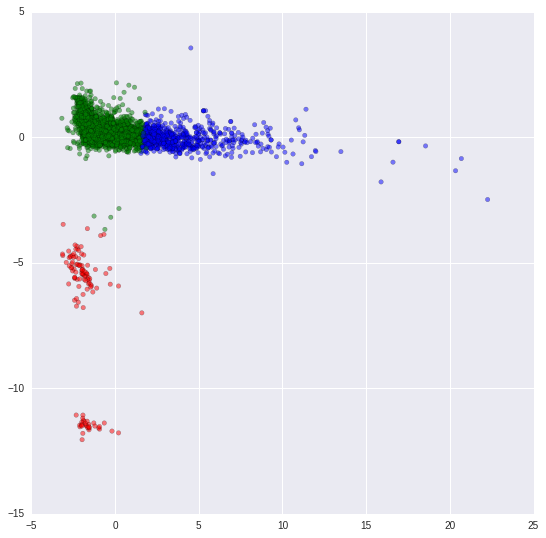

In [20]:
f
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (9,9))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

This KMeans plot looks more promising now as if our simple clustering model assumption turns out to be right, we can observe 3 distinguishable clusters via this color visualisation scheme.
Now, the plot above was only for 2 PCA projections out of the 9 projections that we currently have. However I would also like to generate a KMeans visualisation for other possible combinations of the projections against one another. I will use Seaborn's convenient pairplot function to do the job. Basically pairplot automatically plots all the features in the dataframe (in this case our PCA projected movie data) in pairwise manner. I will pairplot the first 3 projections against one another and the resultant plot is given below:

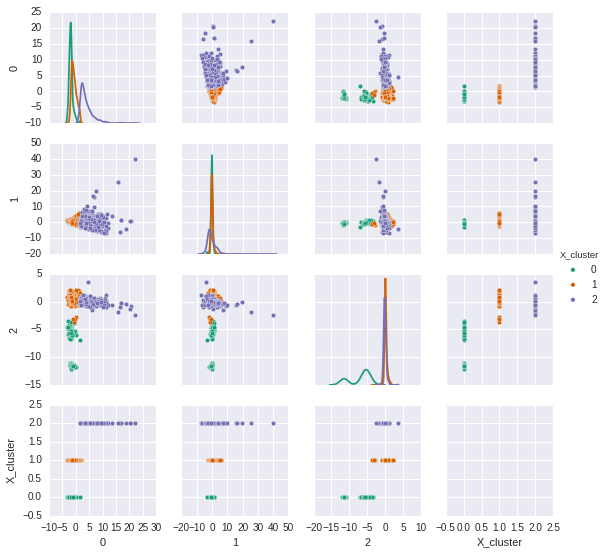

In [22]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_9d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.95)

### Prochainement pour d'autres notebook